# Autism Dataset for Toddlers

Autistic Spectrum Disorder (ASD) is a neurodevelopmental condition with a lengthy and inefficient diagnosis, that results in significant healthcare costs and worse quality of life for the patients and those related to them.

The work to be developed is a classification problem, supported by machine learning models, with the goal of obtaining a fast and accurate ASD diagnosis on toddlers.

The results will be plotted for better visualization and understanding.

## The Dataset

The dataset to be analyzed contains the answers to the Q-Chat-10 behavioural questionnaire and its final score, alongside other characteristics that have proved to be useful in the diagnosis of ASD. 

The questionnaire had as possible answers: “always”, “usually”, “sometimes”, “rarely” and “never”.
For questions A1-A9 “sometimes”, “rarely” and “never” were mapped to 1, others to 0.
For question A10 “always”, “usually”, “sometimes” were mapped to 1, others to 0.


### Importing Libraries

In [1]:
# pip install 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from pycaret.classification import *
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay


### Import dataset

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head(10)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
5,6,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,family member,Yes
6,7,1,0,0,1,1,1,0,0,1,0,33,5,m,asian,yes,no,family member,Yes
7,8,0,1,0,0,1,0,1,1,1,1,33,6,m,asian,yes,no,family member,Yes
8,9,0,0,0,0,0,0,1,0,0,1,36,2,m,asian,no,no,family member,No
9,10,1,1,1,0,1,1,0,1,1,1,22,8,m,south asian,no,no,Health Care Professional,Yes


### Data preprocessing

Here we display some statistics on our data, and check for missing values.

In [4]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [5]:
df.isna().any()

Case_No                   False
A1                        False
A2                        False
A3                        False
A4                        False
A5                        False
A6                        False
A7                        False
A8                        False
A9                        False
A10                       False
Age_Mons                  False
Qchat-10-Score            False
Sex                       False
Ethnicity                 False
Jaundice                  False
Family_mem_with_ASD       False
Who completed the test    False
Class/ASD Traits          False
dtype: bool

#### Dropping unnecessary columns

We are discarting the `Case_no` column since it is not relevant, and the `Qchat-10-Score` because it would serve as a direct indicator of an ASD diagnosis, rendering the other variables, and the purpose of this project useless.

In [6]:
# Need to drop data that is not important
df = df.drop(["Case_No", "Qchat-10-Score"],axis = 'columns')
df.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,White European,no,yes,family member,Yes
5,1,1,0,0,1,1,1,1,1,1,21,m,black,no,no,family member,Yes
6,1,0,0,1,1,1,0,0,1,0,33,m,asian,yes,no,family member,Yes
7,0,1,0,0,1,0,1,1,1,1,33,m,asian,yes,no,family member,Yes
8,0,0,0,0,0,0,1,0,0,1,36,m,asian,no,no,family member,No
9,1,1,1,0,1,1,0,1,1,1,22,m,south asian,no,no,Health Care Professional,Yes


#### Enconding variables

Enconded non numeric variables.

### Data Analysis

We can now, through the use of plots, make an analysis on our data.

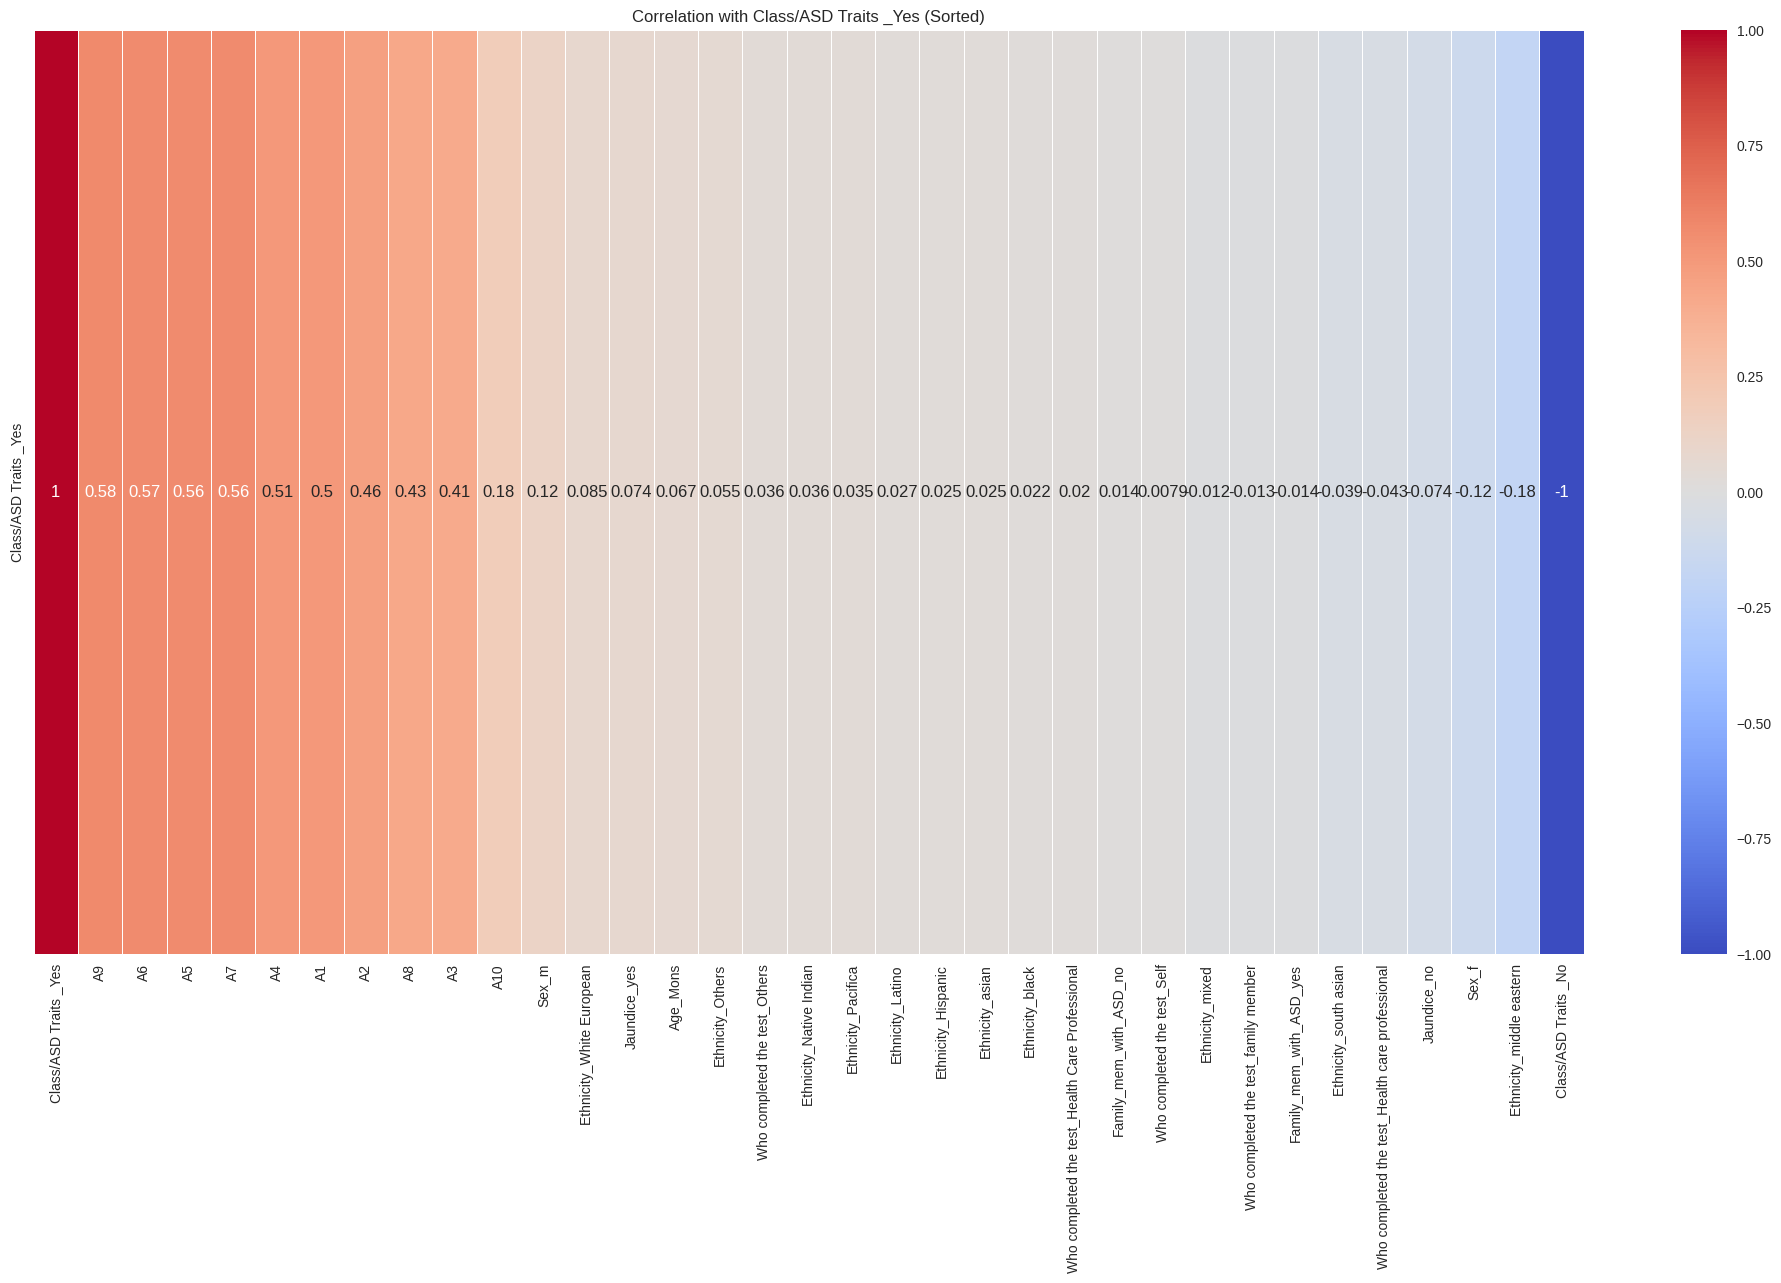

In [7]:
# Get the correlation matrix

df_encoded = pd.get_dummies(df, columns=["Sex", "Ethnicity", "Jaundice", "Family_mem_with_ASD", "Who completed the test", "Class/ASD Traits "])

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

target_correlation = correlation_matrix['Class/ASD Traits _Yes']

sorted_correlation = target_correlation.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(25, 12))
sns.heatmap(correlation_matrix[sorted_correlation.index].loc[['Class/ASD Traits _Yes'], :], annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation with Class/ASD Traits _Yes (Sorted)')
plt.show()


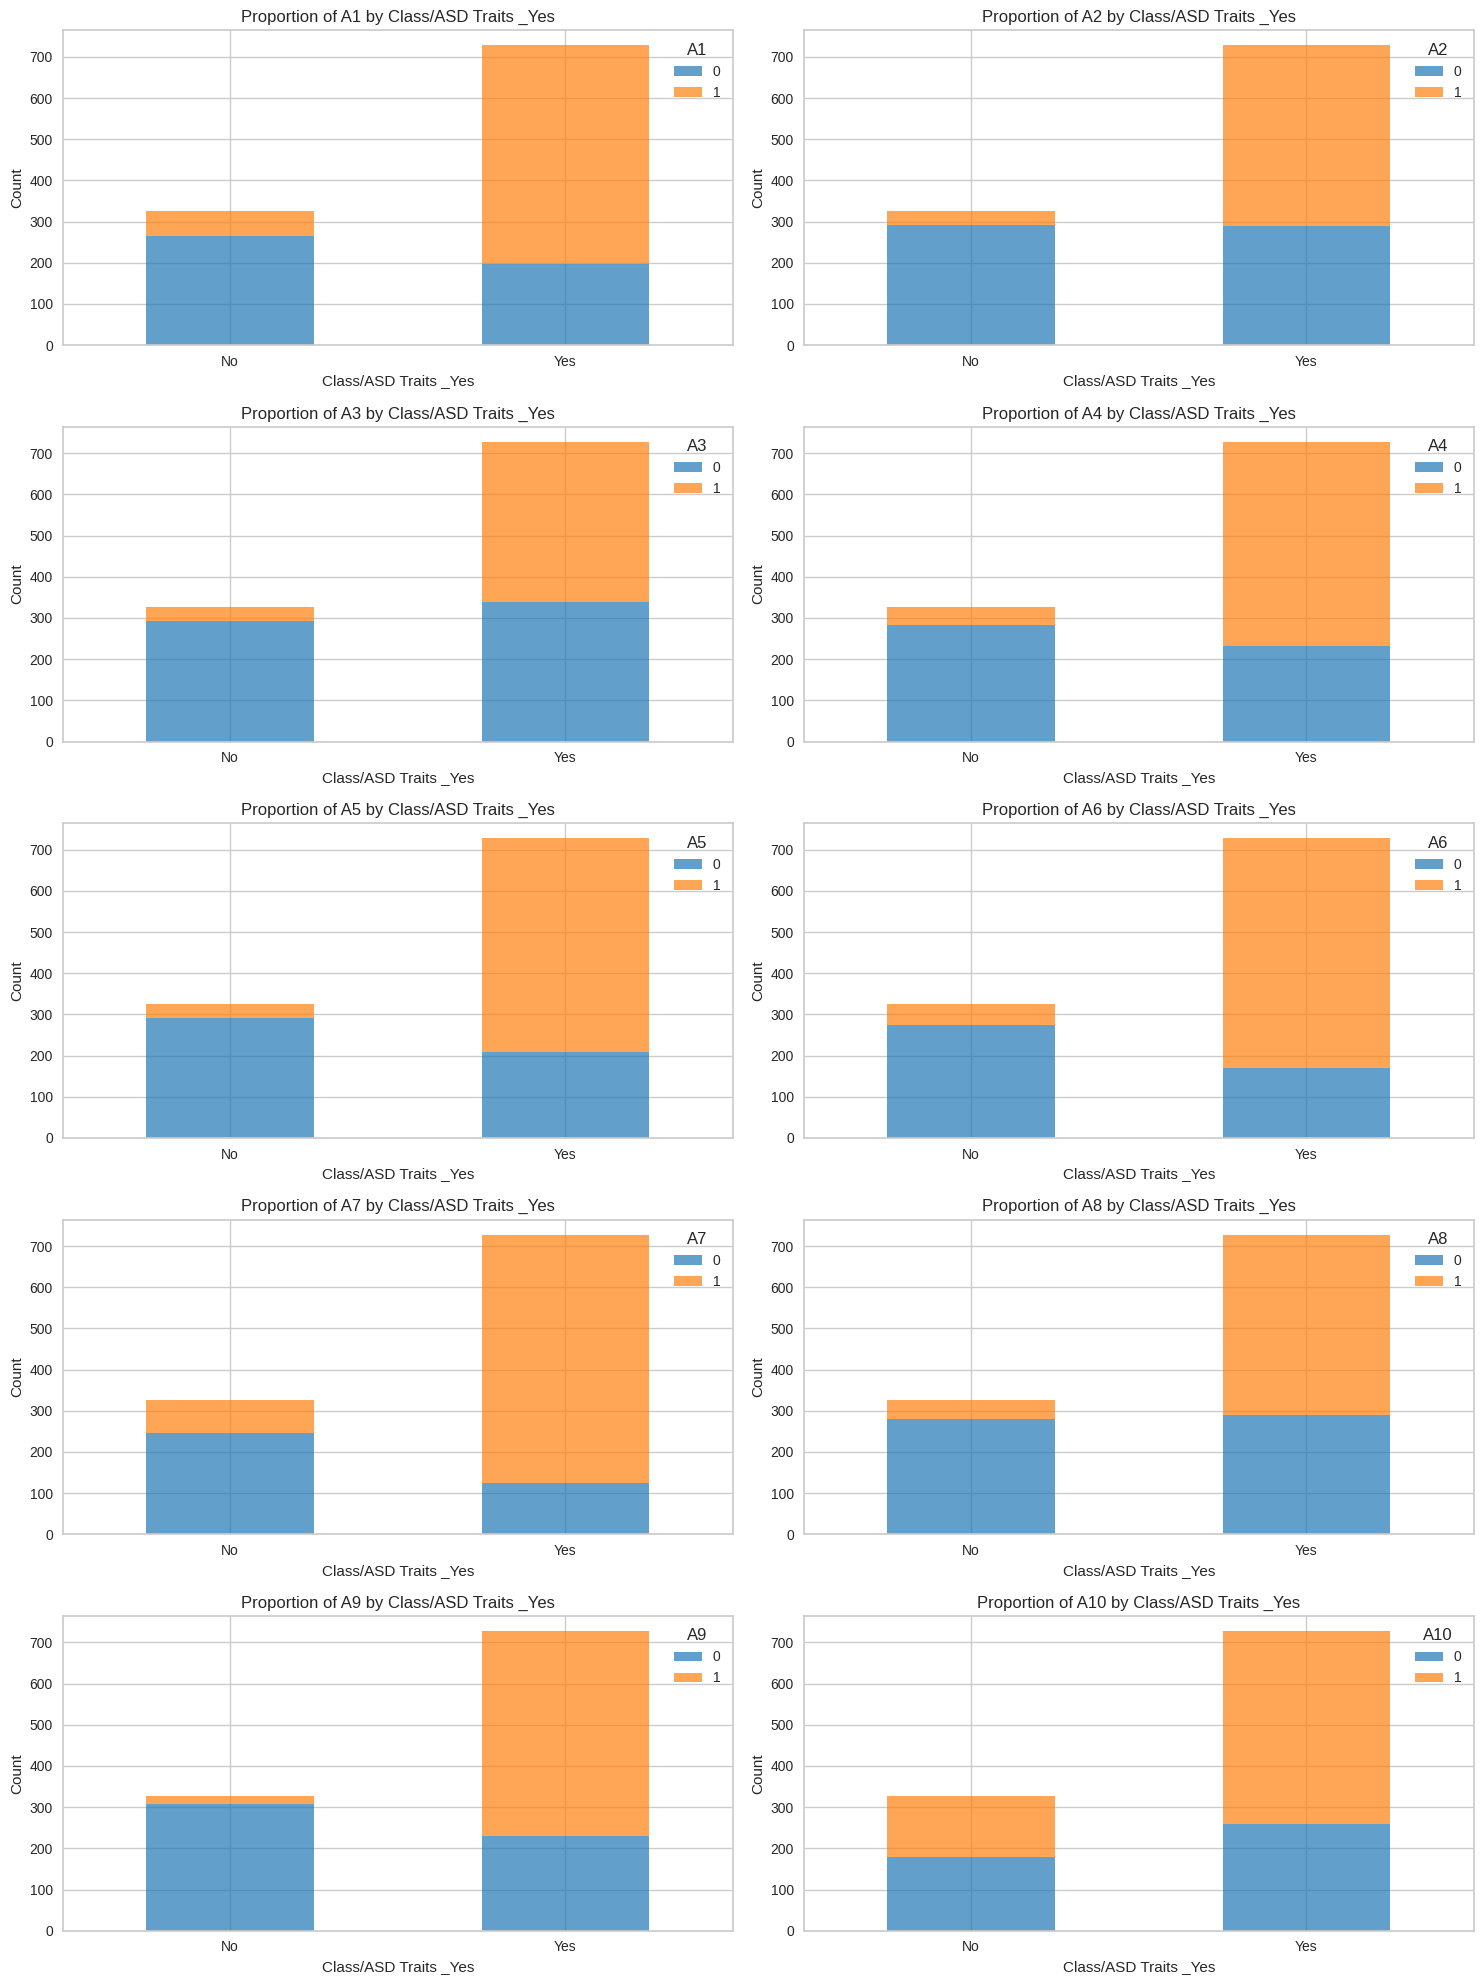

In [8]:
# The Questionaire answers are the only variables that were found out that matters for the ADD diagnosys
# Some dispersions graphs were used to visualize the variables change more

binary_variable_prefix = 'A'

# Create subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Plotting
for i, ax in enumerate(axes.flatten(), 1):
    var = f"{binary_variable_prefix}{i}"
    grouped_data = df_encoded.groupby(['Class/ASD Traits _Yes', var]).size().unstack()
    grouped_data.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], alpha=0.7, ax=ax)
    ax.set_title(f'Proportion of {var} by Class/ASD Traits _Yes')
    ax.set_xlabel('Class/ASD Traits _Yes')
    ax.set_ylabel('Count')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No', 'Yes'], rotation=0)
    ax.legend(title=var, loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

#### Finding correlations between pairs of variables

We must check for correlations between the features themselves, since high correlation can affect the results and performance of the model.

As we can see bellow, there are no relevant high correlations between variables.

In [26]:
for i, col1 in enumerate(df_encoded.columns):
    for j, col2 in enumerate(df_encoded.columns):
        if i < j:
            correlation = correlation_matrix.loc[col1, col2]
            if abs(correlation) >= 0.95:
                print(f"Correlation between '{col1}' and '{col2}': {correlation}")

Correlation between 'Sex_f' and 'Sex_m': -1.0
Correlation between 'Jaundice_no' and 'Jaundice_yes': -1.0
Correlation between 'Family_mem_with_ASD_no' and 'Family_mem_with_ASD_yes': -1.0000000000000002


In [10]:
# Conclusion -> No correlation between any two pairs of variables (Just the trivial correlations)

# Need ot check the balance between Yes and No diagnosis

unique_counts = df_encoded["Class/ASD Traits _Yes"].value_counts()

df_encoded = df_encoded.drop(columns=["Class/ASD Traits _No"])

print(unique_counts)



Class/ASD Traits _Yes
True     728
False    326
Name: count, dtype: int64


### Preparation for model training

Now to prepare for model training, we split the dataframe into training and test sets.

In [11]:
train_df, test_df = train_test_split(df_encoded, test_size=0.2, stratify=df_encoded["Class/ASD Traits _Yes"], random_state=42)


train_counts = train_df["Class/ASD Traits _Yes"].value_counts()
test_counts = test_df["Class/ASD Traits _Yes"].value_counts()

print("Training set distribution:\n", train_counts)
print("Testing set distribution:\n", test_counts)

Training set distribution:
 Class/ASD Traits _Yes
True     582
False    261
Name: count, dtype: int64
Testing set distribution:
 Class/ASD Traits _Yes
True     146
False     65
Name: count, dtype: int64


In [12]:
X_train = train_df.drop(columns=["Class/ASD Traits _Yes"])
y_train = train_df["Class/ASD Traits _Yes"]
X_test = test_df.drop(columns=["Class/ASD Traits _Yes"])
y_test = test_df["Class/ASD Traits _Yes"]

### Model Training

We will run and compare a set of models, and use Pycaret functions to determine the best model.

,Description,Value
0,Session id,42
1,Target,Class/ASD Traits _Yes
2,Target type,Binary
3,Original data shape,"(1054, 34)"
4,Transformed data shape,"(1054, 34)"
5,Transformed train set shape,"(843, 34)"
6,Transformed test set shape,"(211, 34)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0320
lr,Logistic Regression,0.9988,0.9999,1.0000,0.9983,0.9991,0.9972,0.9972,0.0190
svm,SVM - Linear Kernel,0.9964,0.9978,1.0000,0.9949,0.9975,0.9916,0.9917,0.0180
lightgbm,Light Gradient Boosting Machine,0.9751,0.9976,0.9846,0.9798,0.9820,0.9415,0.9422,0.7020
gbc,Gradient Boosting Classifier,0.9716,0.9976,0.9897,0.9705,0.9797,0.9319,0.9339,0.0370
rf,Random Forest Classifier,0.9561,0.9927,0.9794,0.9583,0.9686,0.8956,0.8969,0.0460
lda,Linear Discriminant Analysis,0.9550,0.9928,0.9554,0.9791,0.9667,0.8971,0.8991,0.0160
ridge,Ridge Classifier,0.9538,0.9928,0.9571,0.9757,0.9660,0.8938,0.8954,0.0200
et,Extra Trees Classifier,0.9538,0.9925,0.9777,0.9565,0.9669,0.8902,0.8915,0.0420
knn,K Neighbors Classifier,0.9181,0.9732,0.9244,0.9560,0.9394,0.8131,0.8160,0.0200


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


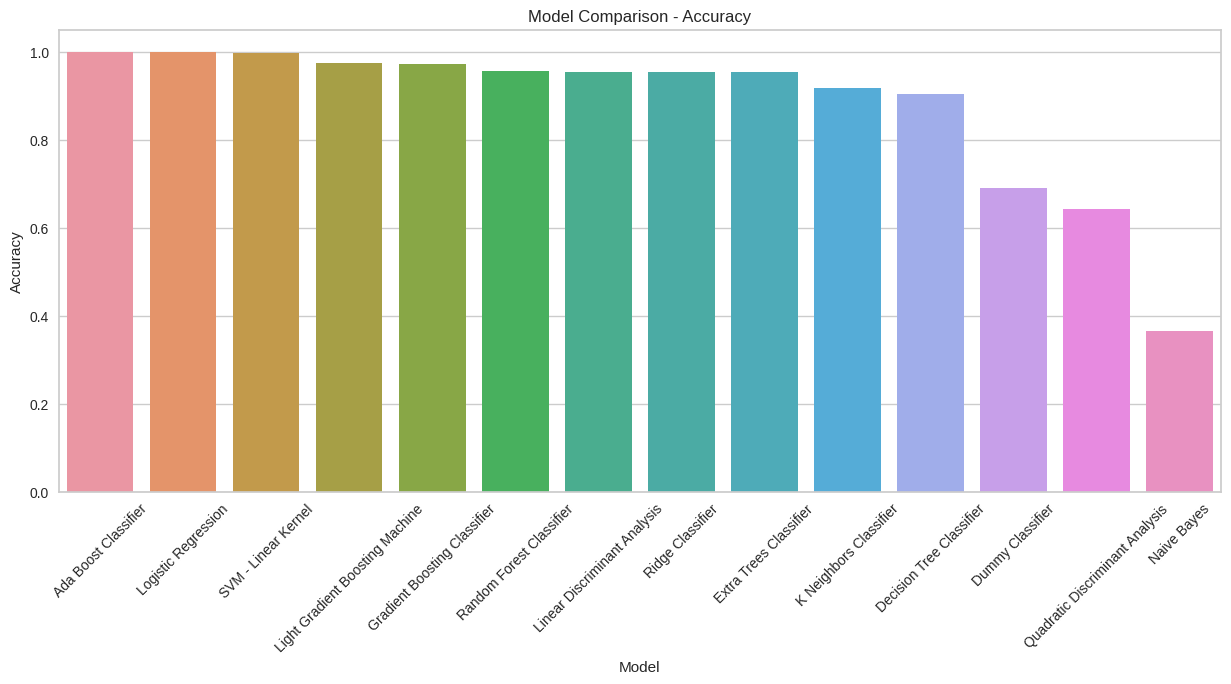

In [11]:
# Assuming df_encoded is already defined and preprocessed
classification_setup = setup(data=df_encoded, 
                             target='Class/ASD Traits _Yes', 
                             train_size=0.8, 
                             session_id=42, 
                             normalize=True, 
                             transformation=True)

# Compare all available models
best_model = compare_models()

# Pull the comparison results
results = pull()

# Optionally finalize the best model
final_best_model = finalize_model(best_model)

# Make predictions on the test set
predictions = predict_model(final_best_model)
#print(predictions)

# Model Comparison Plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Model', y='Accuracy', data=results)
plt.title('Model Comparison - Accuracy')
plt.xticks(rotation=45)
plt.show()


### Decision Tree Results

For comparison, here we display the results of the Decision Tree model.

In [15]:
dt_model = create_model('dt')
final_dt_model = finalize_model(dt_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8824,0.8615,0.9153,0.9153,0.9153,0.7229,0.7229
1,0.9059,0.8784,0.9492,0.9180,0.9333,0.7735,0.7747
2,0.9176,0.9199,0.9138,0.9636,0.9381,0.8155,0.8181
3,0.8929,0.8694,0.9310,0.9153,0.9231,0.7466,0.7469
4,0.9167,0.9078,0.9310,0.9474,0.9391,0.8071,0.8074
5,0.8452,0.8349,0.8621,0.9091,0.8850,0.6491,0.6512
6,0.9048,0.8780,0.9483,0.9167,0.9322,0.7724,0.7736
7,0.9048,0.8992,0.9138,0.9464,0.9298,0.7818,0.7830
8,0.9405,0.9463,0.9310,0.9818,0.9558,0.8650,0.8679


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [16]:
evaluate_model(final_dt_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

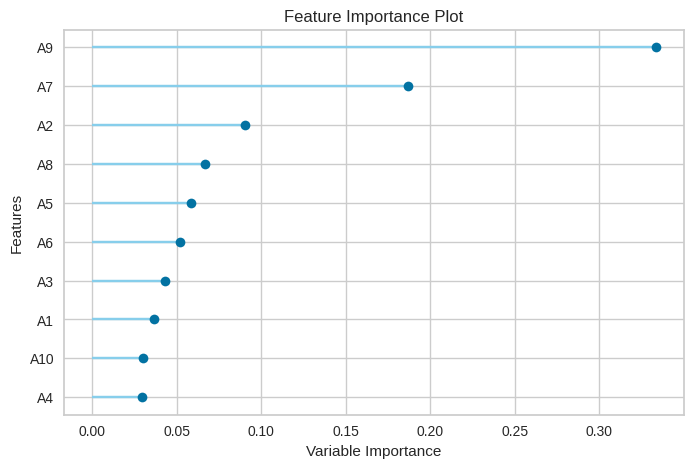

In [17]:
plot_model(final_dt_model, plot='feature')

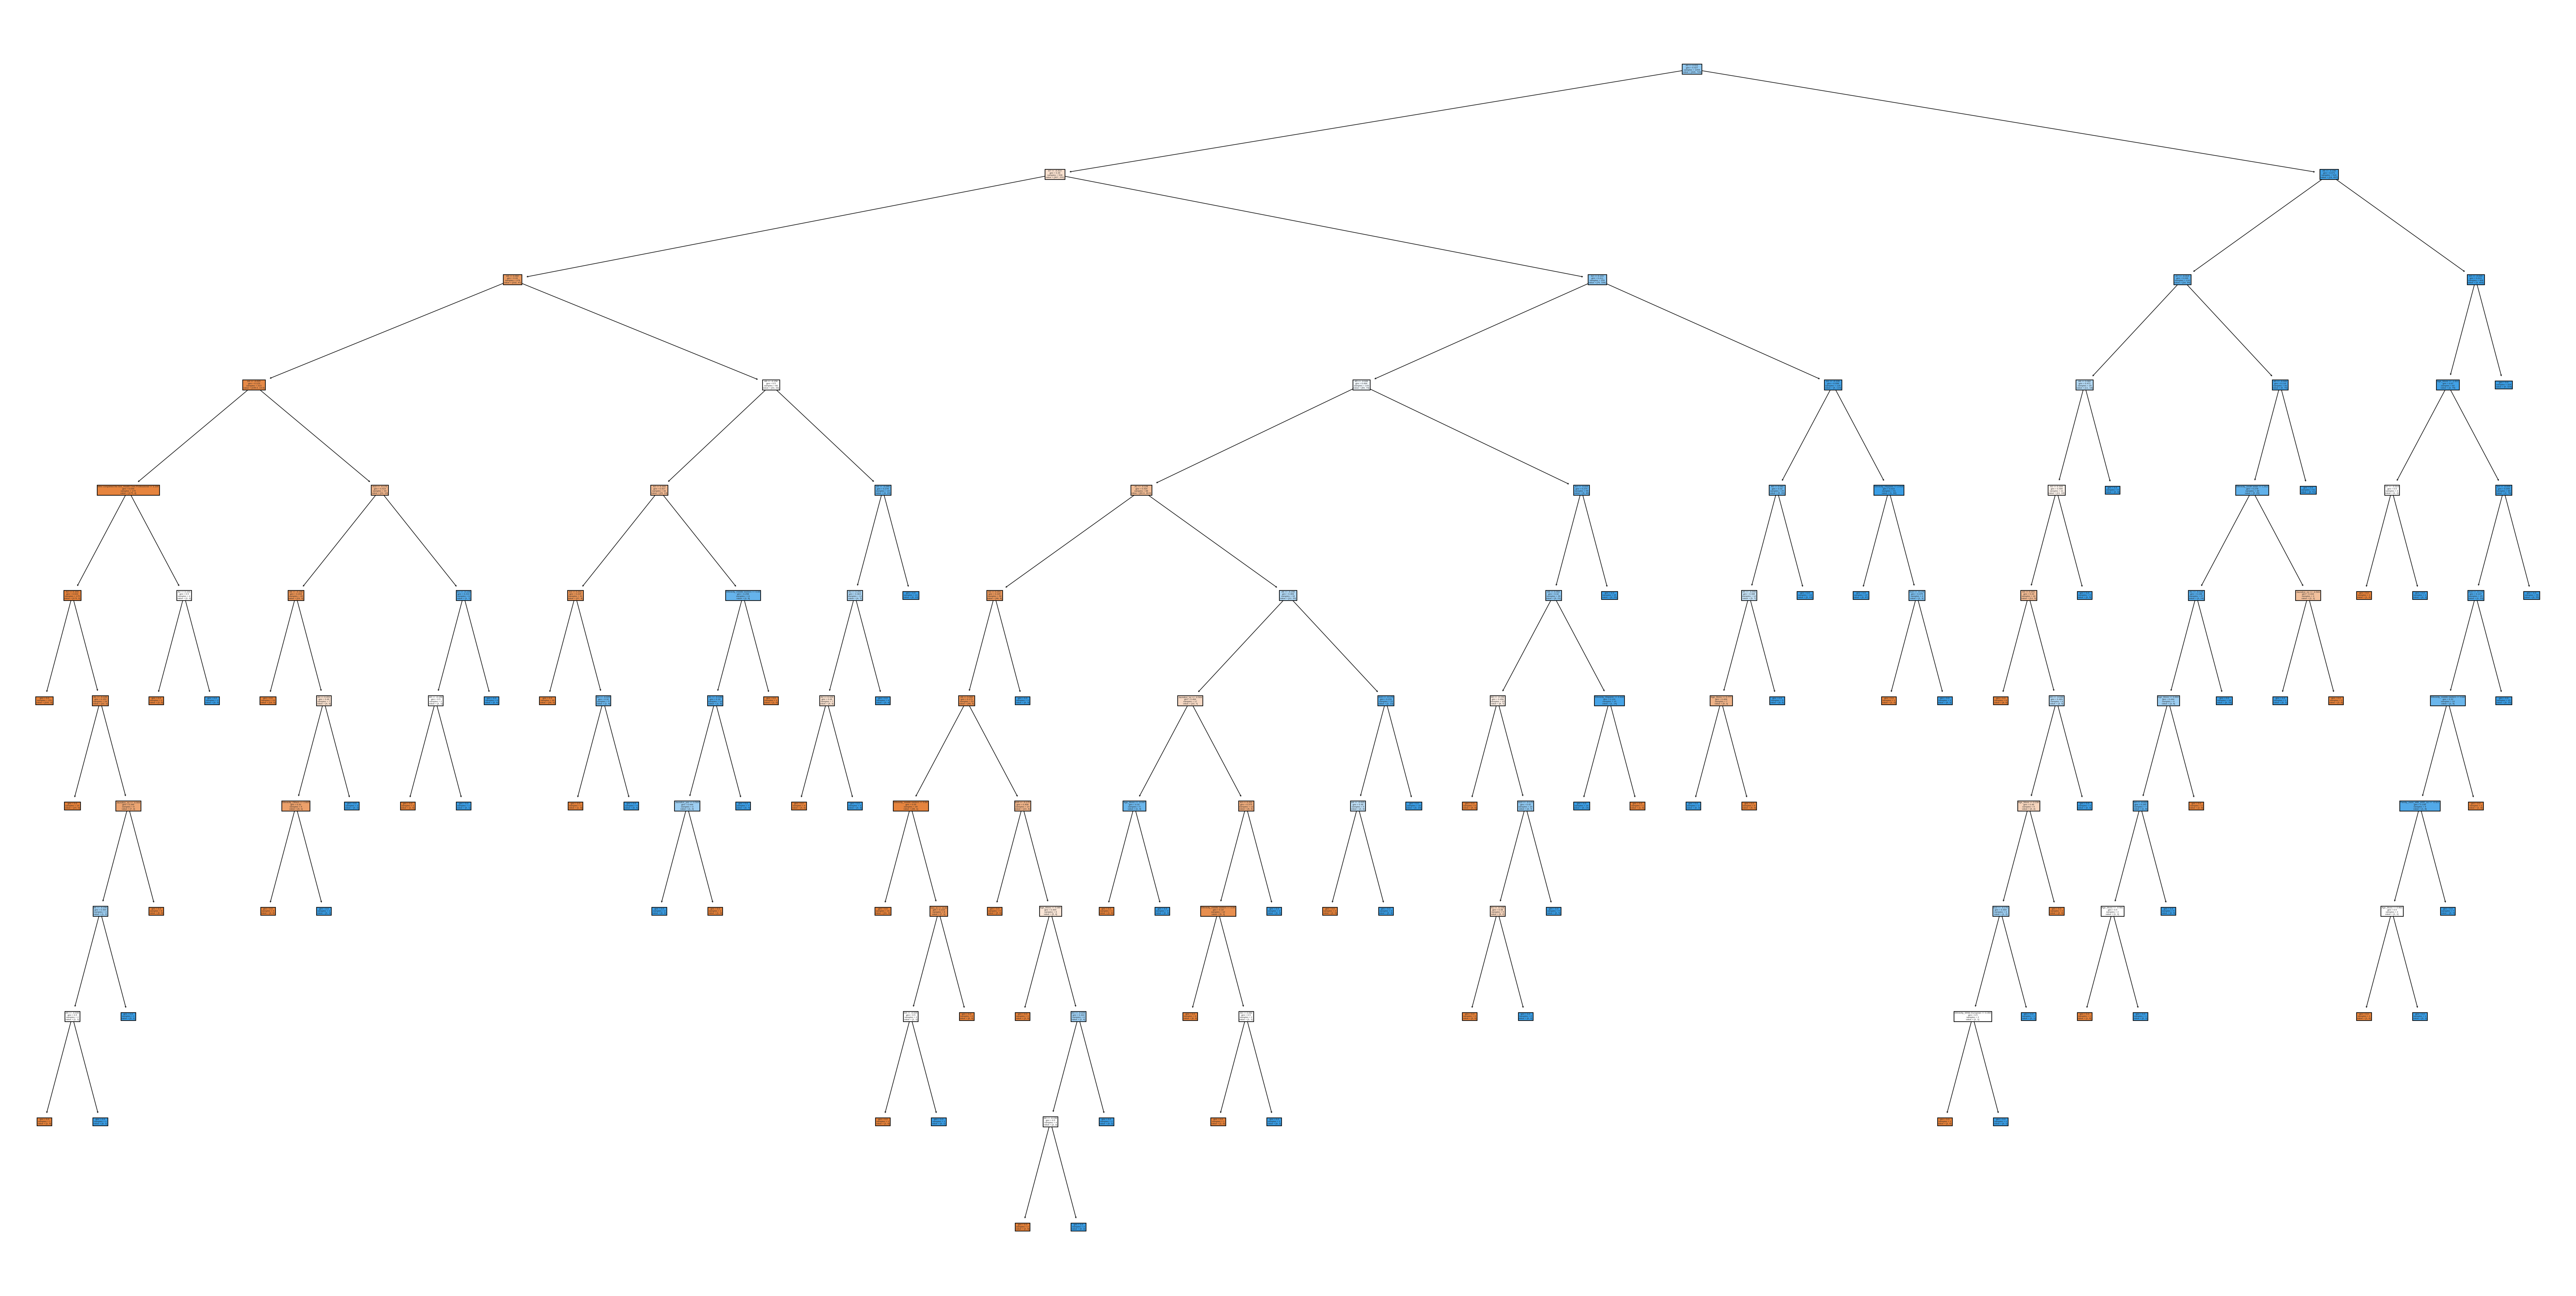

In [18]:
from sklearn.pipeline import Pipeline

# Assuming final_dt_model is the finalized model from PyCaret
# Extract the decision tree from the pipeline
if isinstance(final_dt_model, Pipeline):
    # Get the steps in the pipeline
    pipeline_steps = final_dt_model.steps
    
    # Search for the decision tree component by checking each step
    for step_name, step_obj in pipeline_steps:
        if hasattr(step_obj, 'tree_'):
            decision_tree = step_obj
            break
else:
    decision_tree = final_dt_model

# Plot the decision tree with increased resolution
plt.figure(figsize=(20, 10), dpi=600)
plot_tree(decision_tree, filled=True, feature_names=df_encoded.drop(columns=['Class/ASD Traits _Yes']).columns)
plt.show()



### Ada Boost Classifier Results

From the above results, we can conclude that the best model (tied in accuracy) was the Ada Boost Classifier.

In [28]:
ada_model = create_model('ada')
final_ada_model = finalize_model(ada_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [31]:
evaluate_model(final_ada_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

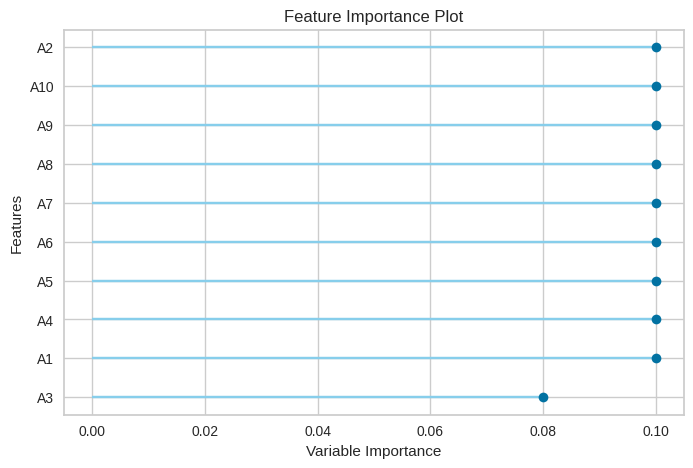

In [19]:
plot_model(final_best_model, plot='feature')

In [20]:
print(final_best_model)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['A1', 'A2', 'A3', 'A4', 'A5', 'A6',
                                             'A7', 'A8', 'A9', 'A10',
                                             'Age_Mons'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(ex...
                 TransformerWrapper(exclude=None, include=None,
                              

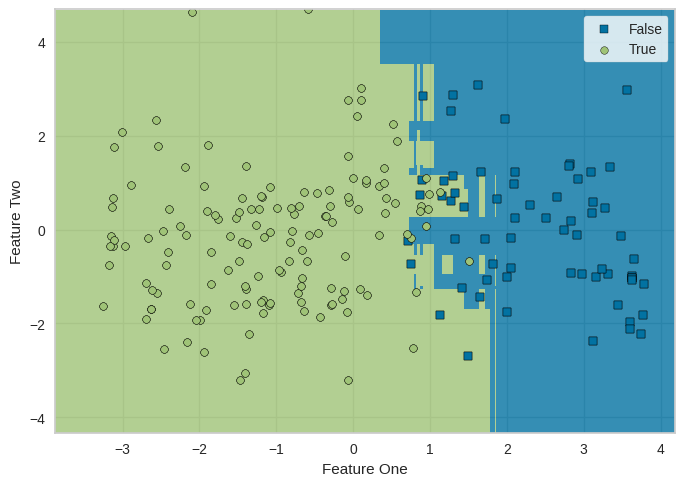

In [21]:
plot_model(final_best_model, plot='boundary')

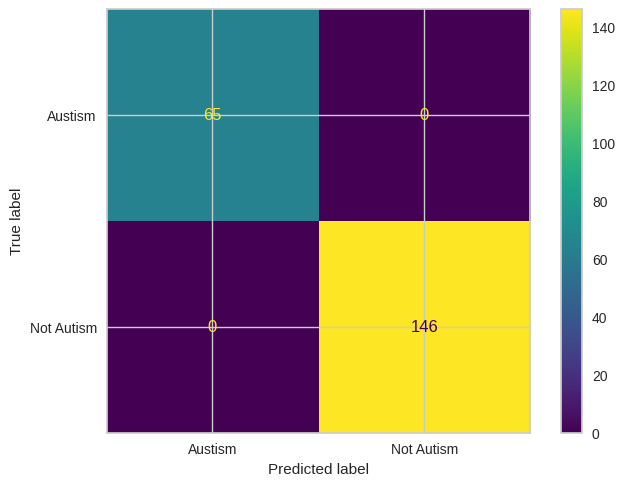

In [22]:
y_predicted = final_best_model.predict(X_test)
confusion_matrix_res = confusion_matrix(y_test, y_predicted)

ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_res, display_labels = ["Austism", "Not Autism",]).plot()
plt.show()

In [24]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        65
        True       1.00      1.00      1.00       146

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

